<a href="https://colab.research.google.com/github/Shivaranjanie/Occupancy/blob/main/Shivaranjanie_ProjectOccupancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install Pycaret**

In [2]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

In [3]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7.5,5.2)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
plt.tight_layout()
plt.show()

<Figure size 540x374.4 with 0 Axes>

In [5]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

The data set provides experimental data used for binary classification (room occupancy of an office room). The data contains 957 instances composed of 5 geometric parameters are extracted along with the data and 1 class variable (Occupancy), which can be summarized as follows. The used data set was found in the Machine Learning Repository of the University of California, Irvine.

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, five geometric parameters of occupancy status dataset were measured:
1. Temperature (Temp),
2. Humidity (Hum),
3. Light (Lght),
4. CO2 Emission (CO2),
5. Humidity Ratio (HRatio)

All of these parameters were real-valued continuous.

https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection

In [6]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Shivaranjanie/Occupancy_FinalTrial/main/Occupany%201_FinalTrialPlz.csv')
df.head(25)

,Temp,Hum,Lght,Co2,Hrat,Occ
0,22.200000,27.290000,299.0,594.333333,0.004517,0
1,20.500000,21.260000,300.0,448.333333,0.003164,0
2,20.500000,21.267500,301.0,443.750000,0.003165,0
3,20.500000,21.290000,302.0,442.500000,0.003168,0
4,20.500000,21.290000,303.0,444.500000,0.003168,0
5,20.200000,20.963333,299.0,445.666667,0.003062,0
6,20.200000,20.890000,300.0,446.000000,0.003051,0
7,20.200000,20.856667,301.0,443.666667,0.003046,0
8,20.200000,20.890000,302.0,439.000000,0.003051,0
9,20.200000,20.790000,303.0,441.000000,0.003037,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    956 non-null    float64
 1   Hum     956 non-null    float64
 2   Lght    956 non-null    float64
 3   Co2     956 non-null    float64
 4   Hrat    956 non-null    float64
 5   Occ     956 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 44.9 KB


In [8]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  19


In [9]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

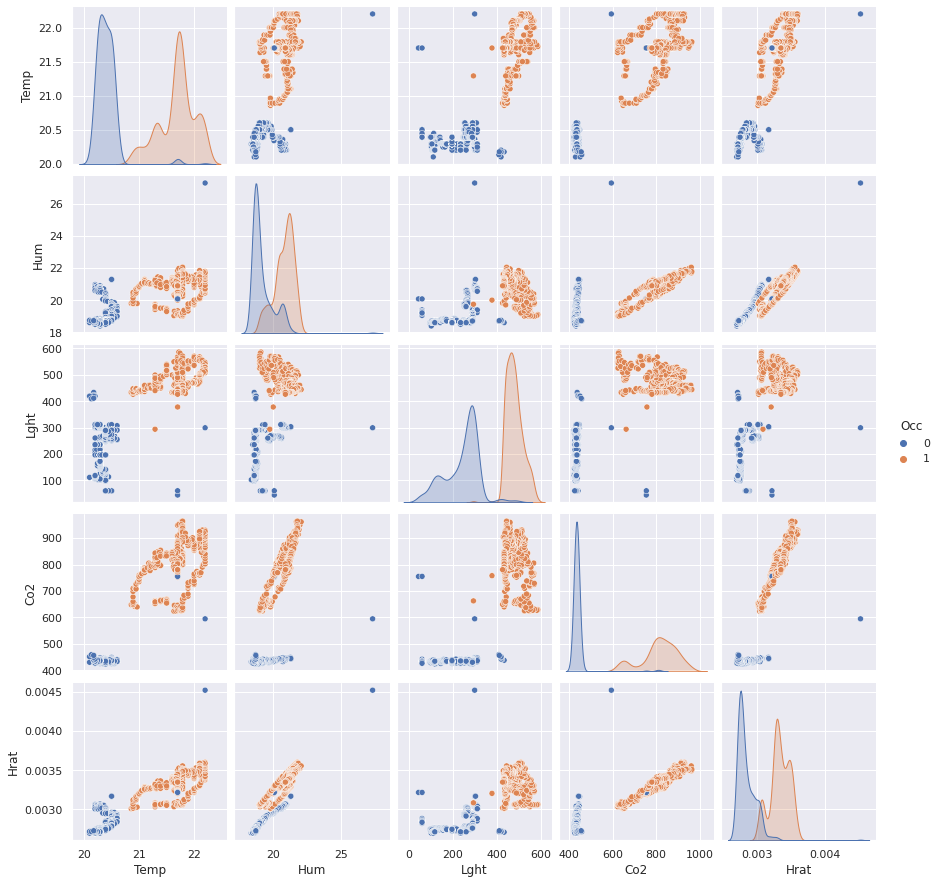

In [ ]:
sns.pairplot(df, hue='Occ')
plt.show()

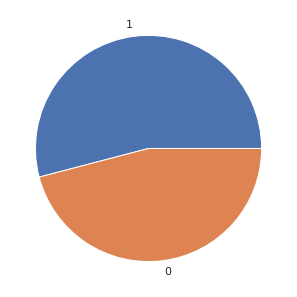

In [10]:
y =df['Occ']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [11]:
X = df.drop(columns=['Occ'])
X.head(10)

,Temp,Hum,Lght,Co2,Hrat
0,22.2,27.290000,299.0,594.333333,0.004517
1,20.5,21.260000,300.0,448.333333,0.003164
2,20.5,21.267500,301.0,443.750000,0.003165
3,20.5,21.290000,302.0,442.500000,0.003168
4,20.5,21.290000,303.0,444.500000,0.003168
5,20.2,20.963333,299.0,445.666667,0.003062
6,20.2,20.890000,300.0,446.000000,0.003051
7,20.2,20.856667,301.0,443.666667,0.003046
8,20.2,20.890000,302.0,439.000000,0.003051
9,20.2,20.790000,303.0,441.000000,0.003037


In [12]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temp,956.0,21.097796,0.699569,20.100000,20.390000,21.200000,21.730000,22.200000
Hum,956.0,20.050102,1.093668,18.390000,18.890000,20.246250,21.000000,27.290000
Lght,956.0,369.845031,132.332584,44.000000,269.000000,433.000000,479.000000,586.000000
Co2,956.0,642.246827,197.717112,423.000000,434.500000,659.125000,830.250000,964.250000
Hrat,956.0,0.003103,0.000282,0.002699,0.002801,0.003077,0.003335,0.004517


**Standardize the Data**

In [13]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,Temp,Hum,Lght,Co2,Hrat
0,1.576372,6.623298,-0.535636,-0.242460,5.017281
1,-0.854968,1.106855,-0.528075,-0.981276,0.215220
2,-0.854968,1.113716,-0.520515,-1.004469,0.219201
3,-0.854968,1.134300,-0.512954,-1.010795,0.231146
4,-0.854968,1.134300,-0.505393,-1.000674,0.231146
5,-1.284028,0.835454,-0.535636,-0.994770,-0.146504
6,-1.284028,0.768367,-0.528075,-0.993083,-0.184703
7,-1.284028,0.737872,-0.520515,-1.004891,-0.202062
8,-1.284028,0.768367,-0.512954,-1.028506,-0.184703
9,-1.284028,0.676883,-0.505393,-1.018385,-0.236787


In [14]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temp,956.0,1.493459e-16,1.000523,-1.427048,-1.012290,0.146172,0.904178,1.576372
Hum,956.0,-1.070506e-15,1.000523,-1.518716,-1.061299,0.179443,0.868998,6.623298
Lght,956.0,-8.358028e-16,1.000523,-2.463608,-0.762456,0.477494,0.825285,1.634277
Co2,956.0,-5.064522e-16,1.000523,-1.109472,-1.051278,0.085410,0.951367,1.629458
Hrat,956.0,2.496840e-16,1.000523,-1.436500,-1.073217,-0.092908,0.820482,5.017281


**Observations and variables**

In [15]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

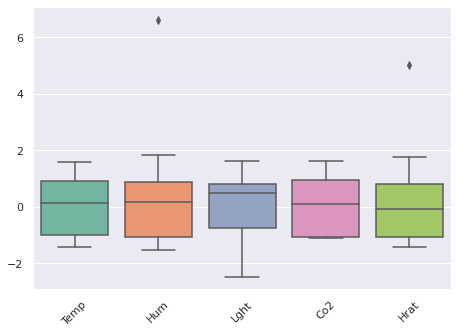

In [17]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

<Figure size 540x374.4 with 0 Axes>

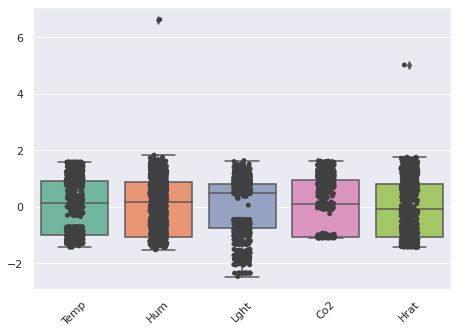

In [18]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

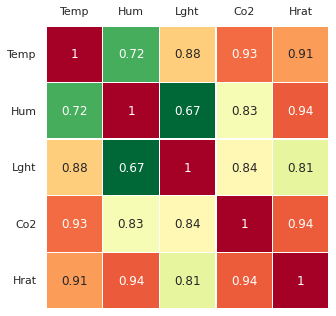

In [19]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

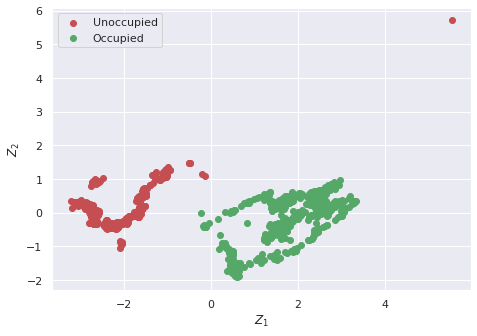

In [20]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Not Occupied)->0,  2(Occupied)->1
idx_NOC = np.where(y == 0)
idx_OC = np.where(y == 1)

plt. figure()
plt.scatter(Z[idx_NOC,0], Z[idx_NOC,1], c='r', label='Unoccupied')
plt.scatter(Z[idx_OC,0], Z[idx_OC,1], c='g', label='Occupied')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

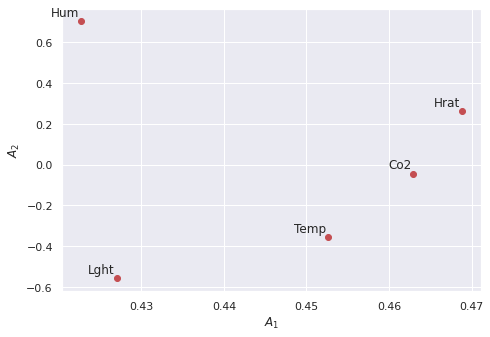

In [21]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


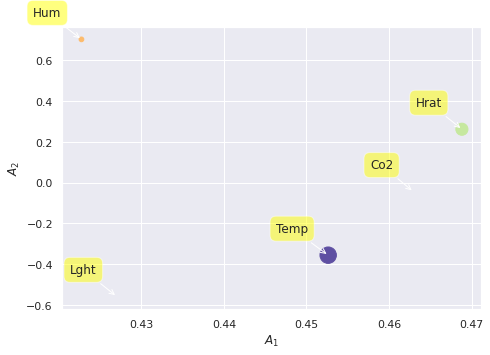

In [22]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

[4.40468148e+00 4.04085579e-01 1.44519534e-01 5.16938235e-02
 2.55182172e-04]


Text(0, 0.5, 'Explained variance')

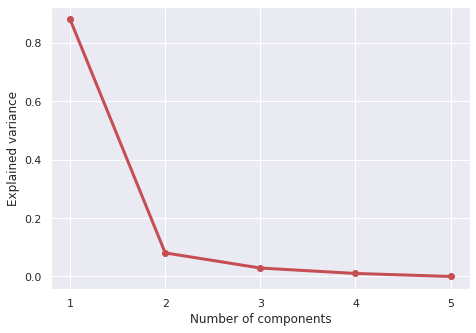

In [23]:
#Eigenvalues
Lambda = pca.explained_variance_ 
print(pca.explained_variance_)

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

In [24]:
pca.components_.T

array([[ 0.45262801, -0.35557677,  0.47417932,  0.53914957, -0.3913627 ],
       [ 0.42272258,  0.70185932, -0.31935428,  0.04477654, -0.47403273],
       [ 0.4269854 , -0.55734011, -0.70621725, -0.08822376,  0.02300509],
       [ 0.46293568, -0.04402648,  0.41236818, -0.78338199, -0.00416787],
       [ 0.46883636,  0.26151927,  0.06615514,  0.29298811,  0.78840447]])

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

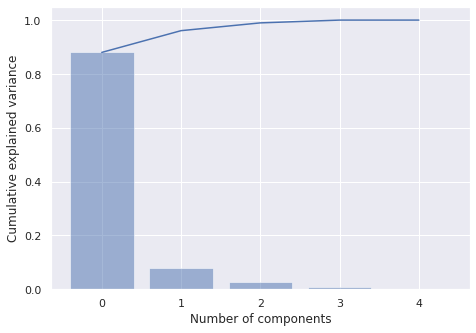

In [25]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

(-6.0, 6.0)

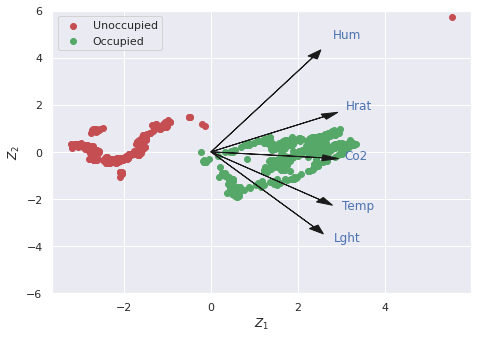

In [26]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.25)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='b')

plt.scatter(Z[idx_NOC,0], Z[idx_NOC,1], c='r', label='Unoccupied')
plt.scatter(Z[idx_OC,0], Z[idx_OC,1], c='g', label='Occupied')
#plt.scatter(Z[idx_Hold,0], Z[idx_Hold,1], c='b', label='OnHold')
plt.legend(loc='upper left')
plt.ylim([-6, 6])

##**Using PCA Library**

In [ ]:
!pip install pca

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=9a711cbafb58df0724733d70cc498105ecb91e0cc8c7630a62fa630d6320eaaa
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [ ]:
out['PC']

,PC1,PC2
0,5.524659,5.709424
1,-0.497935,1.474667
2,-0.500677,1.477331
3,-0.486076,1.490966
4,-0.478162,1.486307
...,...,...
951,1.627897,0.143540
952,1.685550,0.206368
953,1.596301,0.125198
954,1.640752,0.163665


**Scatter plot**

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1b6cbdaa50>)

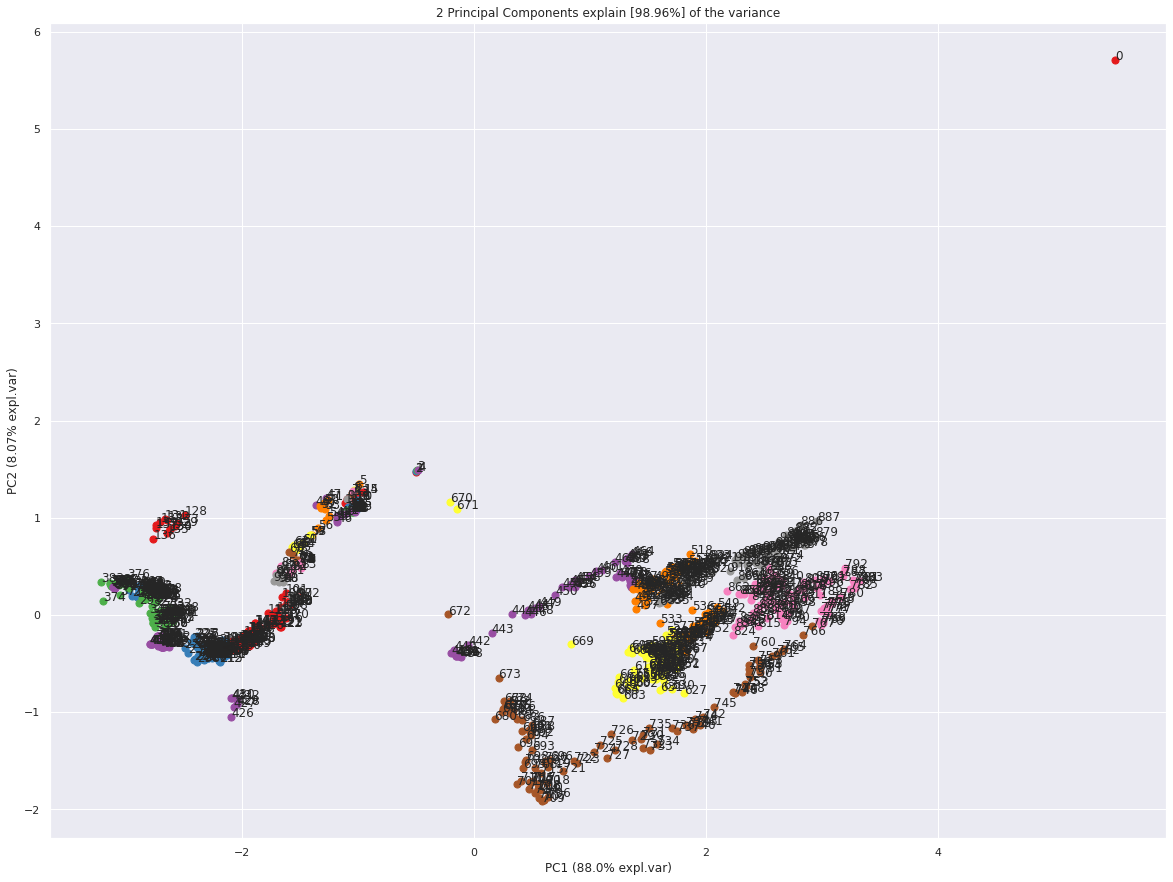

In [ ]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [ ]:
A = out['loadings'].T

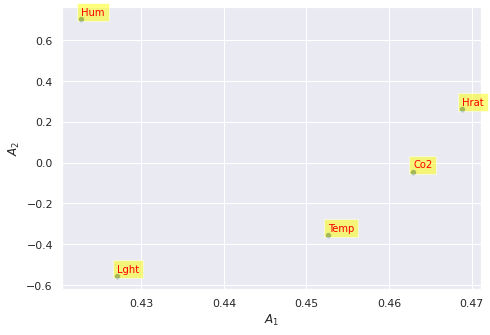

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i],y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

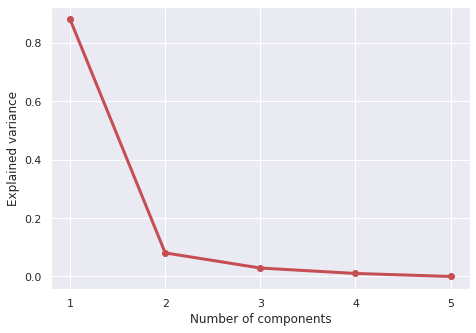

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

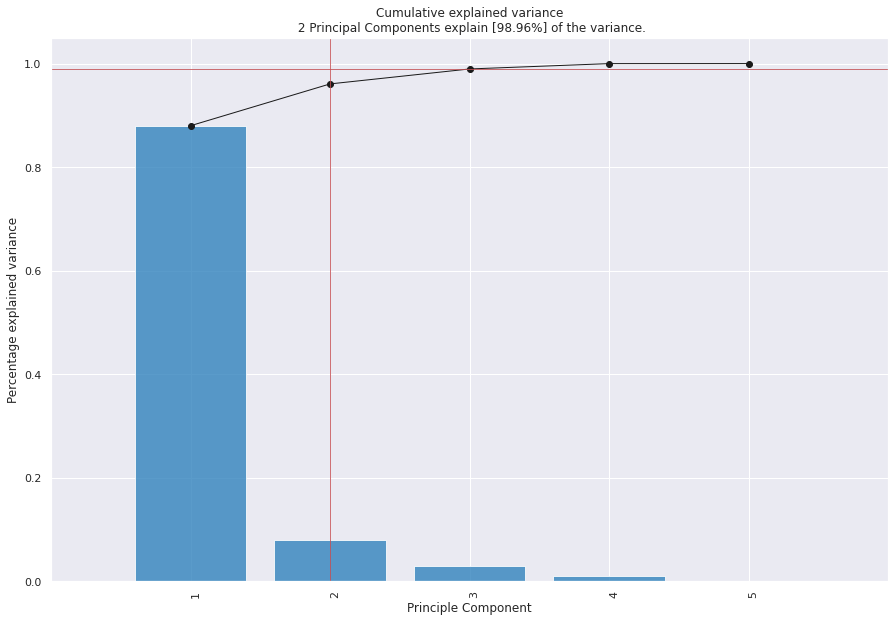

<Figure size 540x374.4 with 0 Axes>

In [ ]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.


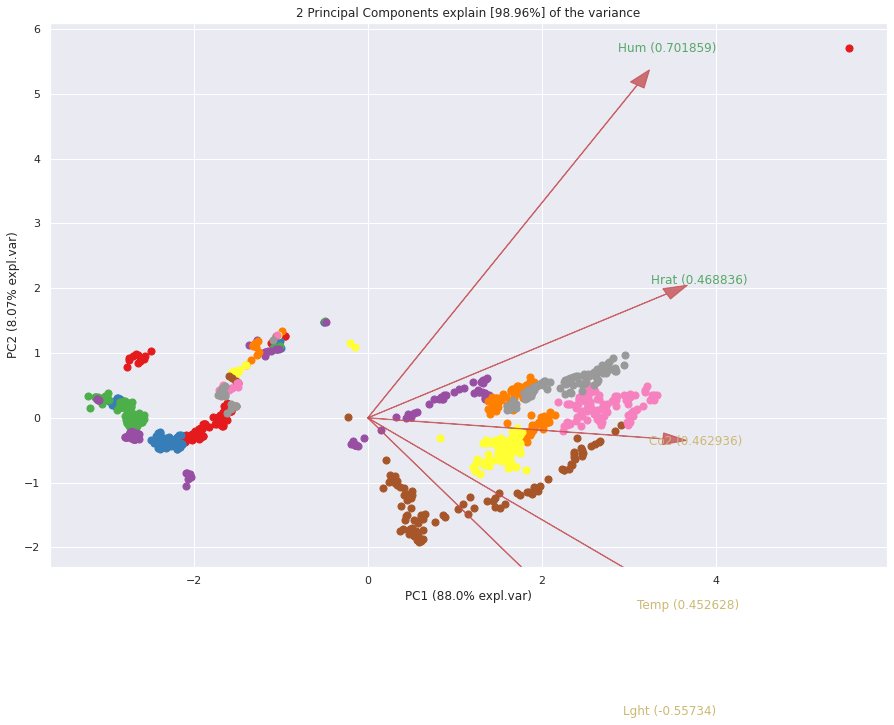

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1b6a1e3210>)

In [ ]:
model.biplot(label=False, legend=False)




In [ ]:
model.biplot3d(legend=False)

[pca] >Requires 3 PCs to make 3d plot. Try to use biplot() instead.


(None, None)

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [ ]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (860, 6)
Unseen Data For Predictions: (96, 6)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='Occ', train_size=0.7, session_id=123)

,Description,Value
0,session_id,123
1,Target,Occ
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(860, 6)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [ ]:
 #show the best model and their statistics
 best_model = compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9950,0.9964,1.0000,0.9912,0.9955,0.9899,0.9901,0.115
nb,Naive Bayes,0.9950,0.9934,1.0000,0.9912,0.9955,0.9899,0.9901,0.014
rf,Random Forest Classifier,0.9950,0.9999,1.0000,0.9912,0.9955,0.9899,0.9901,0.455
lr,Logistic Regression,0.9934,0.9940,0.9970,0.9911,0.9940,0.9866,0.9868,0.255
ridge,Ridge Classifier,0.9934,0.0000,0.9970,0.9911,0.9940,0.9866,0.9868,0.012
qda,Quadratic Discriminant Analysis,0.9934,0.9940,0.9970,0.9911,0.9940,0.9866,0.9868,0.012
et,Extra Trees Classifier,0.9934,0.9999,0.9970,0.9912,0.9940,0.9866,0.9868,0.405
gbc,Gradient Boosting Classifier,0.9917,0.9974,0.9939,0.9911,0.9924,0.9833,0.9835,0.090
lda,Linear Discriminant Analysis,0.9917,0.9908,1.0000,0.9853,0.9925,0.9832,0.9835,0.013
ada,Ada Boost Classifier,0.9901,0.9978,0.9908,0.9910,0.9909,0.9799,0.9801,0.088


In [ ]:
best_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [ ]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9672,0.9670,0.9697,0.9697,0.9697,0.9340,0.9340
1,0.9833,0.9844,0.9688,1.0000,0.9841,0.9666,0.9671
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9667,0.9697,0.9394,1.0000,0.9688,0.9331,0.9352
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9833,0.9815,1.0000,0.9706,0.9851,0.9662,0.9668
9,0.9667,0.9697,0.9394,1.0000,0.9688,0.9331,0.9352


In [ ]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [ ]:
tuned_dt = tune_model(dt)

In [ ]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [ ]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 23.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


How to analyze model performance using various plots

In [ ]:
evaluate_model(tuned_dt)

,Parameters
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,14
max_features,log2
max_leaf_nodes,None
min_impurity_decrease,0
min_impurity_split,None
min_samples_leaf,2
min_samples_split,7


**Create K Neighbors Model**

In [ ]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9836,0.9821,1.0,0.9706,0.9851,0.9669,0.9674
1,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
8,0.9833,0.9815,1.0,0.9706,0.9851,0.9662,0.9668
9,0.9833,1.0000,1.0,0.9706,0.9851,0.9662,0.9668


**Tune K Neighbors Model**

In [ ]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9836,0.9978,1.0,0.9706,0.9851,0.9669,0.9674
1,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
8,0.9833,0.9994,1.0,0.9706,0.9851,0.9662,0.9668
9,0.9833,0.9983,1.0,0.9706,0.9851,0.9662,0.9668


**Evaluate K Neighbors Model**

In [ ]:
evaluate_model(tuned_knn)

**Create Logistic Regression Model**

In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9672,0.9838,0.9697,0.9697,0.9697,0.9340,0.9340
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9833,0.9798,1.0000,0.9706,0.9851,0.9662,0.9668
9,0.9833,0.9764,1.0000,0.9706,0.9851,0.9662,0.9668


**Tune Logistic Regression Model**

In [ ]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9672,0.9838,0.9697,0.9697,0.9697,0.9340,0.9340
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9833,0.9787,1.0000,0.9706,0.9851,0.9662,0.9668
9,0.9833,0.9764,1.0000,0.9706,0.9851,0.9662,0.9668


**Evaluate Logistic Regression Model**

In [ ]:
evaluate_model(tuned_lr)

**Create Random Forest Model**

In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9836,0.9989,1.0,0.9706,0.9851,0.9669,0.9674
1,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
8,0.9833,1.0000,1.0,0.9706,0.9851,0.9662,0.9668
9,0.9833,1.0000,1.0,0.9706,0.9851,0.9662,0.9668


**Tune Random Forest Model**

In [ ]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9672,0.9665,0.9697,0.9697,0.9697,0.9340,0.9340
1,0.9833,1.0000,0.9688,1.0000,0.9841,0.9666,0.9671
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9833,1.0000,0.9697,1.0000,0.9846,0.9664,0.9670
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9833,0.9989,1.0000,0.9706,0.9851,0.9662,0.9668


**Evaluate Random Forest Model**

In [ ]:
evaluate_model(tuned_rf)

,Parameters
bootstrap,False
ccp_alpha,0.0
class_weight,balanced_subsample
criterion,gini
max_depth,6
max_features,1.0
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0
min_impurity_split,None


#**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

In [ ]:
tuned_best_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=49, p=2,
                     weights='uniform')

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model)

#**Classification + PCA**

In [ ]:
clf_pca = setup(data=data, target='Occ', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

,Description,Value
0,session_id,123
1,Target,Occ
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(860, 6)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9950,1.0000,1.0000,0.9912,0.9955,0.9899,0.9901,0.110
ridge,Ridge Classifier,0.9950,0.0000,1.0000,0.9912,0.9955,0.9899,0.9901,0.011
lda,Linear Discriminant Analysis,0.9950,0.9926,1.0000,0.9912,0.9955,0.9899,0.9901,0.012
et,Extra Trees Classifier,0.9950,0.9992,1.0000,0.9912,0.9955,0.9899,0.9901,0.400
lr,Logistic Regression,0.9934,0.9934,0.9970,0.9911,0.9940,0.9866,0.9868,0.229
svm,SVM - Linear Kernel,0.9934,0.0000,0.9970,0.9911,0.9940,0.9866,0.9868,0.012
rf,Random Forest Classifier,0.9934,0.9982,0.9970,0.9911,0.9940,0.9866,0.9868,0.450
qda,Quadratic Discriminant Analysis,0.9934,0.9933,0.9970,0.9911,0.9940,0.9866,0.9868,0.012
lightgbm,Light Gradient Boosting Machine,0.9934,0.9973,0.9970,0.9911,0.9940,0.9866,0.9868,0.066
nb,Naive Bayes,0.9917,0.9948,0.9939,0.9911,0.9924,0.9833,0.9835,0.013


In [ ]:
best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9836,0.9951,1.0,0.9706,0.9851,0.9669,0.9674
1,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
8,0.9833,0.9983,1.0,0.9706,0.9851,0.9662,0.9668
9,0.9833,0.9949,1.0,0.9706,0.9851,0.9662,0.9668


In [ ]:
tuned_best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=49, p=2,
                     weights='uniform')

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model_pca)

,Parameters
algorithm,auto
leaf_size,30
metric,minkowski
metric_params,None
n_jobs,-1
n_neighbors,49
p,2
weights,uniform


**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 25.3 MB/s 


In [ ]:
import shap

In [ ]:
rf_pca = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9672,0.9946,0.9697,0.9697,0.9697,0.9340,0.9340
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9833,0.9882,1.0000,0.9706,0.9851,0.9662,0.9668
9,0.9833,0.9989,1.0000,0.9706,0.9851,0.9662,0.9668


In [ ]:
tuned_rf_pca = tune_model(rf_pca)

**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

In [ ]:
interpret_model(tuned_rf_pca, plot='summary')

In [ ]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason')